<a href="https://colab.research.google.com/github/abhijeet06793/Deep_Learning/blob/master/Sign_Language_Digits_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==================Sign Language Digits Prediction===============

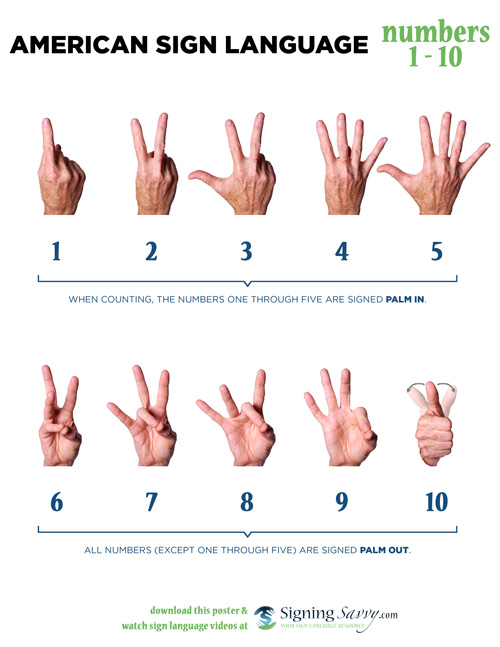

**Context**

Sign languages (also known as signed languages) are languages that use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas. Source: https://en.wikipedia.org/wiki/Sign_language

**Details of datasets:**
* Image size: 64x64
* Color space: Grayscale
* File format: npy
* Number of classes: 10 (Digits: 0-9)
* Number of participant students: 218
* Number of samples per student: 10

**Details of datasets in GitHub Repo:**
* Repo: github.com/ardamavi/Sign-Language-Digits-Dataset
* Image size: 100x100
* Color space: RGB

https://github.com/ardamavi/Sign-Language-Digits-Dataset

In [1]:
#Importing Libraries 

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam, Adadelta, SGD
from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import glorot_normal, glorot_uniform, he_normal, he_uniform, HeNormal, HeUniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
import os
import random
import re
import shutil

import warnings
warnings.filterwarnings("ignore")

In [44]:
#Check the number of datapoints in each class in Sign Language Digits dataset 
d = {
"data_0" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/0')),
"data_1" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/1')),
"data_2" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/2')),
"data_3" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/3')),
"data_4" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/4')),
"data_5" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/5')),
"data_6" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/6')),
"data_7" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/7')),
"data_8" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/8')),
"data_9" : (os.listdir(path=r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/9'))
   }

print("Number of datapoints in each class :")
print("Class 0: ",len(d['data_0']))
print("Class 1: ",len(d['data_1']))
print("Class 2: ",len(d['data_2']))
print("Class 3: ",len(d['data_3']))
print("Class 4: ",len(d['data_4']))
print("Class 5: ",len(d['data_5']))
print("Class 6: ",len(d['data_6']))
print("Class 7: ",len(d['data_7']))
print("Class 8: ",len(d['data_8']))
print("Class 9: ",len(d['data_9']))

Number of datapoints in each class :
Class 0:  205
Class 1:  206
Class 2:  206
Class 3:  206
Class 4:  207
Class 5:  207
Class 6:  207
Class 7:  206
Class 8:  208
Class 9:  204


In [31]:
#Creating the folder structure - for train, test and validation

if os.path.isdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data')==True:
  os.mkdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train')
  os.mkdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test')
  os.mkdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation')

if os.path.isdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train')== True:
  for i in range(0,10):
    os.mkdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/'+str(i))

if os.path.isdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test')== True:
  for i in range(0,10):
    os.mkdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/'+str(i))

if os.path.isdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation')== True:
  for i in range(0,10):
    os.mkdir(r'/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/'+str(i))

In [56]:
from tqdm import tqdm

#Copying the data from the dataste to train, test and validation
#Train data has 64%, test has 20% and validation has 16% data.

for folder in tqdm(list(d.keys())):
  for img in d[folder][0:int(len(d[folder])*0.64)]:
    shutil.copy(src = '/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/' + folder[-1]+ '/'+img, \
                dst = '/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/'+folder[-1])
  
  for img in d[folder][int(len(d[folder])*0.64):int(len(d[folder])*0.64)+int(len(d[folder])*0.16)]:
    shutil.copy(src = '/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/' + folder[-1]+ '/'+img, \
                                              dst = '/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/'+folder[-1])
    
  for img in d[folder][int(len(d[folder])*0.64)+int(len(d[folder])*0.16):]:
    shutil.copy(src = '/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/Dataset/' + folder[-1]+ '/'+img, \
                                              dst = '/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/'+folder[-1])
  

100%|██████████| 10/10 [00:00<00:00, 42.01it/s]


In [61]:
#Check the number of datapoints in each class in Training data
data_0_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/0"))
data_1_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/1"))
data_2_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/2"))
data_3_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/3"))
data_4_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/4"))
data_5_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/5"))
data_6_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/6"))
data_7_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/7"))
data_8_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/8"))
data_9_tr = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train/9"))

print("Datapoints Train Data :")
print("Class 0: ",len(data_0_tr))
print("Class 1: ",len(data_1_tr))
print("Class 2: ",len(data_2_tr))
print("Class 3: ",len(data_3_tr))
print("Class 4: ",len(data_4_tr))
print("Class 5: ",len(data_5_tr))
print("Class 6: ",len(data_6_tr))
print("Class 7: ",len(data_7_tr))
print("Class 8: ",len(data_8_tr))
print("Class 9: ",len(data_9_tr))

print("*"*20)

#Check the number of datapoints in each class in validation data
data_0_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/0"))
data_1_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/1"))
data_2_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/2"))
data_3_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/3"))
data_4_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/4"))
data_5_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/5"))
data_6_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/6"))
data_7_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/7"))
data_8_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/8"))
data_9_val = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation/9"))

print("Datapoints Validation Data :")
print("Class 0: ",len(data_0_val))
print("Class 1: ",len(data_1_val))
print("Class 2: ",len(data_2_val))
print("Class 3: ",len(data_3_val))
print("Class 4: ",len(data_4_val))
print("Class 5: ",len(data_5_val))
print("Class 6: ",len(data_6_val))
print("Class 7: ",len(data_7_val))
print("Class 8: ",len(data_8_val))
print("Class 9: ",len(data_9_val))

print("*"*20)

#Check the number of datapoints in each class in Test data
data_0_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/0"))
data_1_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/1"))
data_2_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/2"))
data_3_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/3"))
data_4_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/4"))
data_5_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/5"))
data_6_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/6"))
data_7_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/7"))
data_8_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/8"))
data_9_te = (os.listdir(path=r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test/9"))

print("Datapoints Test Data :")
print("Class 0: ",len(data_0_te))
print("Class 1: ",len(data_1_te))
print("Class 2: ",len(data_2_te))
print("Class 3: ",len(data_3_te))
print("Class 4: ",len(data_4_te))
print("Class 5: ",len(data_5_te))
print("Class 6: ",len(data_6_te))
print("Class 7: ",len(data_7_te))
print("Class 8: ",len(data_8_te))
print("Class 9: ",len(data_9_te))

Datapoints Train Data :
Class 0:  131
Class 1:  131
Class 2:  131
Class 3:  131
Class 4:  132
Class 5:  132
Class 6:  132
Class 7:  131
Class 8:  133
Class 9:  130
********************
Datapoints Validation Data :
Class 0:  32
Class 1:  32
Class 2:  32
Class 3:  32
Class 4:  33
Class 5:  33
Class 6:  33
Class 7:  32
Class 8:  33
Class 9:  32
********************
Datapoints Test Data :
Class 0:  42
Class 1:  43
Class 2:  43
Class 3:  43
Class 4:  42
Class 5:  42
Class 6:  42
Class 7:  43
Class 8:  42
Class 9:  42


In [64]:
#Image Data Augmentation

train_path = r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/train"
test_path = r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/test"
val_path = r"/content/Sign_Language_Dataset/Sign-Language-Digits-Dataset-master/model_data/validation"

#Creating a ImageDataGenerator object which generate Tensor image data with real time data augmentaion for each image 
datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) #the preprocess_input is required to be done before runing mobilenet

#Now in below code it takes the path of the directory & generates batches of augmented data. It create batch of data so here its creating data in batch size of 50.
#It will create batches of data from the directory where our dataset resides.

train_datagen = datagen.flow_from_directory(directory=train_path, target_size=(224, 224), classes = ["0","1","2","3","4","5","6","7","8","9"], batch_size=10)
val_datagen = datagen.flow_from_directory(directory=val_path, target_size=(224, 224), classes = ["0","1","2","3","4","5","6","7","8","9"], batch_size=10)
test_datagen = datagen.flow_from_directory(directory=test_path, target_size=(224, 224), classes = ["0","1","2","3","4","5","6","7","8","9"], batch_size=10, shuffle=False)
# train_datagen is a DirectoryIterator yielding tuples of (x, y)


Found 1314 images belonging to 10 classes.
Found 324 images belonging to 10 classes.
Found 424 images belonging to 10 classes.


In [68]:
#The total number of batch created is total_data / batch_size = 16000 / 50 = 320
print("The number of batches of data in train_datagen is",len(train_datagen))
print("The number of batches of data in test_datagen is",len(test_datagen))
print("The number of batches of data in val_datagen is",len(val_datagen))

The number of batches of data in train_datagen is 132
The number of batches of data in test_datagen is 43
The number of batches of data in val_datagen is 33


In [71]:
#Function to plot image

def plot_image(image_array):
    fig , axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(image_array, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [73]:
print("Class: ",train_datagen.class_indices)
print("Total size of Train: ",train_datagen.n)

Class:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
Total size of Train:  1314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Shape imgs: (10, 224, 224, 3)


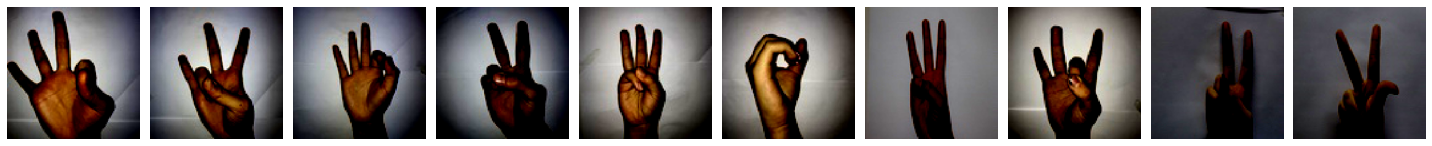

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [74]:
imgs, labels = next(train_datagen) 
print("Shape imgs:", imgs.shape)

plot_image(imgs)
print(labels)

# MobileNet Model - Fine tuned Model

As mobilenet is a functional model we cannot just take each layer and add all the layers Sequentially. There might be some residual connerction , some soler getting added at later point of time. So its not a good idea to make it sequential.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

https://keras.io/guides/functional_api/

In [83]:
mobile_model = tf.keras.applications.mobilenet.MobileNet()
print(type(mobile_model))
print("\n")
mobile_model.summary() 

<class 'tensorflow.python.keras.engine.functional.Functional'>


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

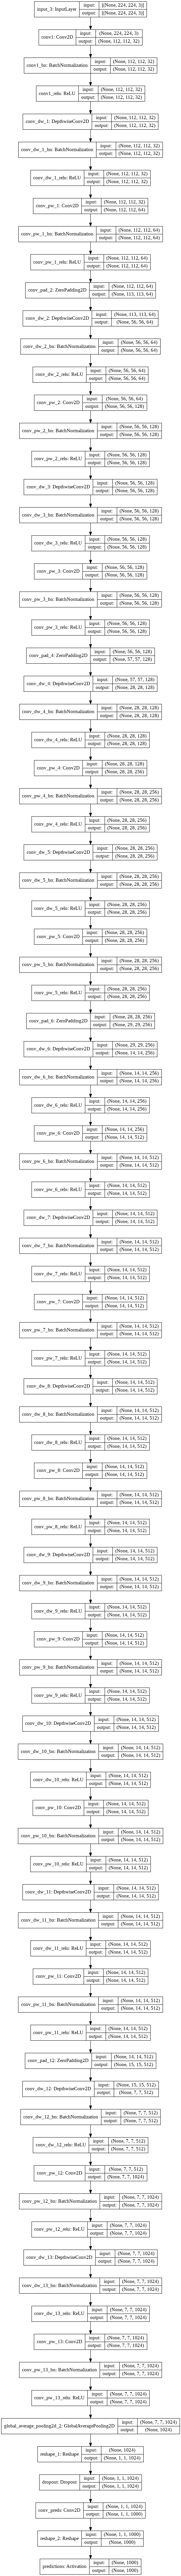

In [84]:
tf.keras.utils.plot_model(mobile_model, show_shapes=True)

In [89]:
x = mobile_model.layers[-6].output #this x gives the output till the last 6 layers
x = tf.keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)

x = tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)

final_output = tf.keras.layers.Dense(units=10, activation='softmax')(x)

#we can create a Model by specifying its inputs and outputs in the graph of layers
model = tf.keras.Model(inputs = mobile_model.input, outputs=final_output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [92]:
for layers in model.layers[0:-7]:
    layers.trainable = False    # all the layers are frozed except last layer. so all the layers ahve weights fixed.

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

model.fit(x = train_datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10
132/132 [==============================] - 56s 407ms/step - loss: 0.3888 - accuracy: 0.8658 - val_loss: 0.4202 - val_accuracy: 0.8580
Epoch 2/10
132/132 [==============================] - 54s 408ms/step - loss: 0.2724 - accuracy: 0.9148 - val_loss: 0.4696 - val_accuracy: 0.8951
Epoch 3/10
132/132 [==============================] - 54s 410ms/step - loss: 0.2098 - accuracy: 0.9314 - val_loss: 0.3075 - val_accuracy: 0.8827
Epoch 4/10
132/132 [==============================] - 55s 414ms/step - loss: 0.1356 - accuracy: 0.9563 - val_loss: 0.3274 - val_accuracy: 0.8981
Epoch 5/10
132/132 [==============================] - 54s 411ms/step - loss: 0.1546 - accuracy: 0.9468 - val_loss: 0.2413 - val_accuracy: 0.9259
Epoch 6/10
132/132 [==============================] - 53s 405ms/step - loss: 0.0950 - accuracy: 0.9703 - val_loss: 0.4190 - val_accuracy: 0.8827
Epoch 7/10
132/132 [==============================] - 53s 406ms/step - loss: 0.0647 - accuracy: 0.9813 - val_loss: 0.2880 - val_ac

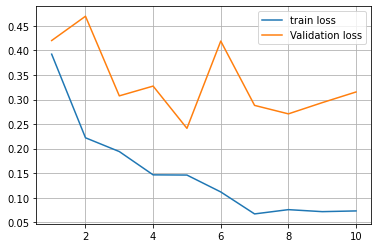

In [95]:
#plotting train and validation loss

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_loss, label="train loss")
plt.plot(range(1,11), val_loss, label="Validation loss")
plt.legend()
plt.show()

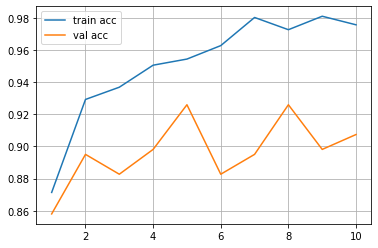

In [96]:
#Plotting train and validation accuracy
train_accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_accuracy, label="train acc")
plt.plot(range(1,11), val_accuracy, label="val acc")
plt.legend()
plt.show()

In [97]:
model_pred = model.predict(test_datagen)
pred_class = np.argmax(model_pred, axis = 1)
confusion_matrix(test_datagen.classes, pred_class)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  2,  1,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  0, 32,  0,  7,  2,  0,  0],
       [ 0,  0,  0,  2,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 40,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1, 40,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8, 34,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  4,  0, 35]])